# Probability Mass Function


## PMF

probability of values

In [1]:
# include packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# Probability Mass Function
def PMF(l):
    d = {}
    n = len(l)
    for i in l:
        d[i] = d.get(i, 0) + (1/n)
    return d

# Sum of Probabilities
def TotalPMF(d):
    s = 0
    for i in d:
        s += d[i]
    return s

In [3]:
l = [1,2,2,3,5,5]

print(PMF(l))
print("total :", TotalPMF(PMF(l)))

{1: 0.16666666666666666, 2: 0.3333333333333333, 3: 0.16666666666666666, 5: 0.3333333333333333}
total : 1.0


<BarContainer object of 4 artists>

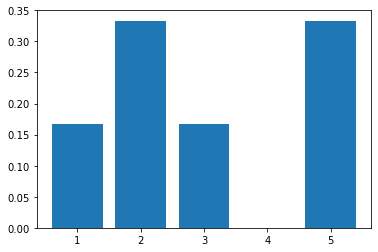

In [4]:
# plot

pmf = PMF(l)
pltval = pmf.keys()
plthgt = pmf.values()
plt.bar(pltval, plthgt)

## Distribution of cyclist data

In [5]:
# read data
# source - https://www.kaggle.com/datasets/bkvishwas/cyclistic-case-study

csv_file = os.getcwd() + r'/dataset/cyclistic.csv'
df = pd.read_csv(csv_file)

In [6]:
df.head()

,all_trips_v2$member_casual,all_trips_v2$day_of_week,all_trips_v2$ride_length
0,casual,Sunday,3581.405388
1,member,Sunday,919.974616
2,casual,Monday,3372.286923
3,member,Monday,842.572569
4,casual,Tuesday,3596.359949


In [7]:
casual_riders = df[df['all_trips_v2$member_casual']=='casual']
member_riders = df[df['all_trips_v2$member_casual']=='member']

<BarContainer object of 7 artists>

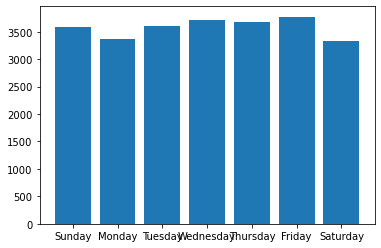

In [8]:
# ride length for casual riders

plt.bar(casual_riders['all_trips_v2$day_of_week'],casual_riders['all_trips_v2$ride_length'])

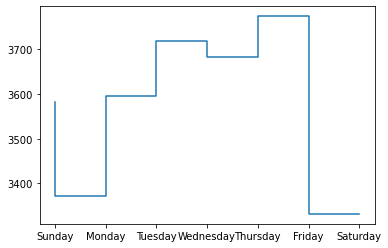

In [9]:
plt.step(casual_riders['all_trips_v2$day_of_week'],casual_riders['all_trips_v2$ride_length'])

<BarContainer object of 7 artists>

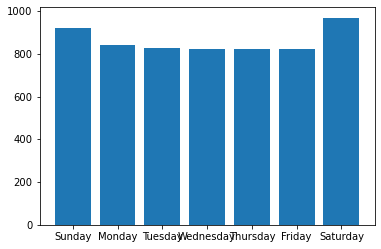

In [10]:
# ride length for member riders

plt.bar(member_riders['all_trips_v2$day_of_week'],member_riders['all_trips_v2$ride_length'])

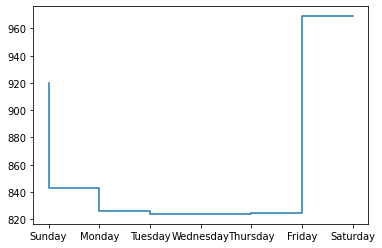

In [11]:
plt.step(member_riders['all_trips_v2$day_of_week'],member_riders['all_trips_v2$ride_length'])

<BarContainer object of 14 artists>

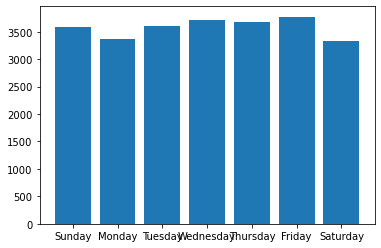

In [12]:
# ride length for both casual and member

plt.bar(df['all_trips_v2$day_of_week'],df['all_trips_v2$ride_length'])

In [13]:
# average ride length for casual riders

casual_riders['all_trips_v2$ride_length'].mean()

3579.635397197527

In [14]:
# average ride length for member riders

member_riders['all_trips_v2$ride_length'].mean()

861.4402299168477

The average ride length of both the riders are very different.

## DataFrame Indexing

In [15]:
array = np.random.randn(5,2)
df = pd.DataFrame(array)
df

,0,1
0,-0.683798,1.602226
1,0.441266,0.828512
2,0.484581,0.909514
3,0.712761,0.895623
4,0.326398,0.100830


In [16]:
# naming columns

df = pd.DataFrame(array, columns=['A', 'B'])
df

,A,B
0,-0.683798,1.602226
1,0.441266,0.828512
2,0.484581,0.909514
3,0.712761,0.895623
4,0.326398,0.100830


In [17]:
# naming index

df = pd.DataFrame(array, columns=['A', 'B'], index=['a','b','c','d','e'])
df

,A,B
a,-0.683798,1.602226
b,0.441266,0.828512
c,0.484581,0.909514
d,0.712761,0.895623
e,0.326398,0.100830


In [18]:
df.loc['a']

A   -0.683798
B    1.602226
Name: a, dtype: float64

In [19]:
df.iloc[0]

A   -0.683798
B    1.602226
Name: a, dtype: float64

In [20]:
# Slicing

df['a':'c']

,A,B
a,-0.683798,1.602226
b,0.441266,0.828512
c,0.484581,0.909514


In [21]:
df[0:2]

,A,B
a,-0.683798,1.602226
b,0.441266,0.828512


## Calculating Mean and Variance by PMF

In [22]:
def PmfMean(d):
    mean = 0
    for i in d:
        mean += d[i]*i
    return mean

def PmfVar(d, mean):
    var = 0
    for i in d:
        var += d[i]*((i - mean)**2)
    return var

In [23]:
l = [1,2,2,3,5,5]

pmfmean = PmfMean(PMF(l))
print(pmfmean)
pmfvar = PmfVar(PMF(l), pmfmean)
print(pmfvar)

3.0
2.333333333333333
